In [6]:
%matplotlib inline 
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [ ]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [4]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq='H', periods=20))
ts_lagged = ts.shift(5)

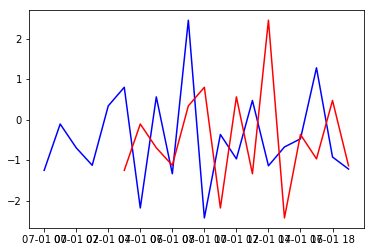

In [7]:
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

In [8]:
ts_lagged = ts.shift(-5)

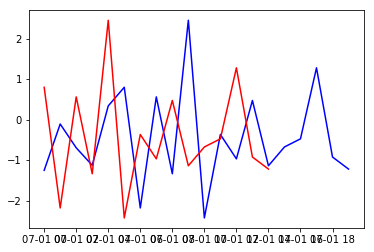

In [9]:
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

In [2]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

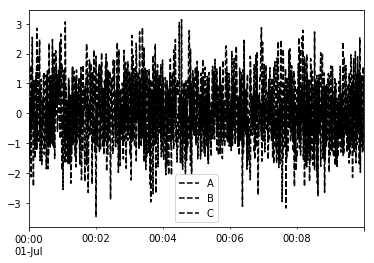

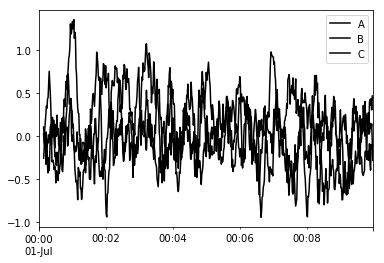

In [3]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

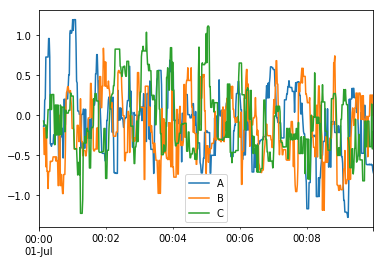

In [10]:
r.quantile(.5).plot()

In [11]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,-0.869928,-0.625113,-0.070639
2016-07-01 00:00:02,-0.469097,-0.574914,0.154416
2016-07-01 00:00:03,-0.265032,0.081989,0.160660
2016-07-01 00:00:04,-0.744226,-0.105221,0.100716
2016-07-01 00:00:05,-0.607033,-0.103467,0.282435
2016-07-01 00:00:06,-0.310119,0.441437,0.165369
2016-07-01 00:00:07,-0.339419,0.326947,0.110354
2016-07-01 00:00:08,-0.373765,-0.169210,0.282628
2016-07-01 00:00:09,-0.125463,0.045994,0.059003


In [12]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [13]:
df.head()

,A,B,C,D
2016-06-06,-2.318438,0.123691,0.992337,0.171273
2016-06-07,-0.962848,-0.334145,-1.104839,0.524965
2016-06-08,2.015459,-1.238971,-1.194956,2.069579
2016-06-09,-1.156520,-0.186747,0.328220,1.000568
2016-06-10,0.179370,0.932947,-0.176244,0.017889


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa04a3f98>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5a9e8787f0>], dtype=object)

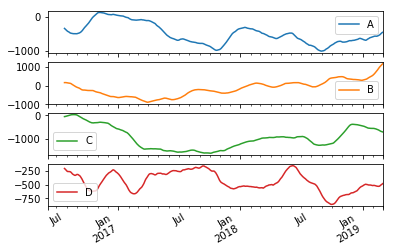

In [14]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [15]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.736121,1.506950,2.073014,1.300429


# Expanding windows

In [16]:
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-2.799861,-0.043382,0.439918,0.433755
2016-06-08,-2.288516,-0.512063,-0.142541,1.211109
2016-06-09,-2.321973,-0.793091,-0.351715,1.849928
2016-06-10,-2.306174,-0.775118,-0.512468,2.236797


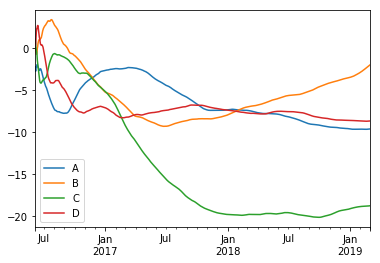

In [17]:
df.expanding(min_periods = 1).mean().plot()

In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

An expanding window provide a more or less stable statistic than a rolling statistic

# EWM

In [18]:
# Why use EWMA?
df.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,-2.831956,-0.054520,0.403090,0.451254
2016-06-08,-2.238865,-0.582768,-0.244691,1.327775
2016-06-09,-2.294288,-0.900965,-0.466572,2.064393
2016-06-10,-2.281120,-0.850220,-0.643364,2.505758
2016-06-11,-2.065521,-0.547471,-1.100620,2.485809
2016-06-12,-1.851671,0.162510,-1.958299,2.760000
2016-06-13,-2.197055,0.407198,-2.405005,2.925901
2016-06-14,-2.379964,0.957708,-2.802585,2.818299
2016-06-15,-2.477684,1.212686,-3.418190,2.253687


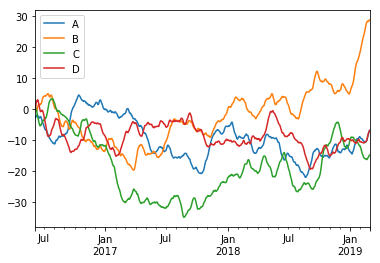

In [19]:
df.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean().plot()

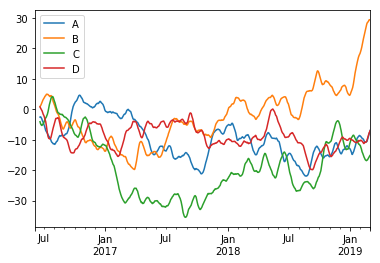

In [20]:
df.rolling(window=15).mean().plot()

In [25]:
r = df.rolling(window=20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN


In [26]:
r.agg(['sum', 'count']).head()

A         B         C         D      
           sum count sum count sum count sum count
2016-06-06 NaN   1.0 NaN   1.0 NaN   1.0 NaN   1.0
2016-06-07 NaN   2.0 NaN   2.0 NaN   2.0 NaN   2.0
2016-06-08 NaN   3.0 NaN   3.0 NaN   3.0 NaN   3.0
2016-06-09 NaN   4.0 NaN   4.0 NaN   4.0 NaN   4.0
2016-06-10 NaN   5.0 NaN   5.0 NaN   5.0 NaN   5.0

In [21]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate
dfa = pd.DataFrame(np.random.randn(1000, 3), index=pd.date_range('1/1/2000', periods=1000), columns=['A', 'B', 'C'])

In [22]:
r = dfa.rolling(window=60,min_periods=1)

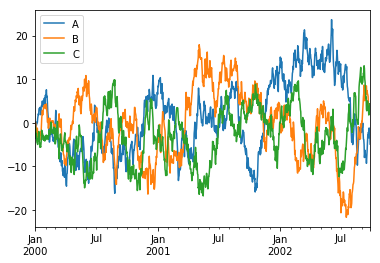

In [23]:
r.aggregate(np.sum).plot()

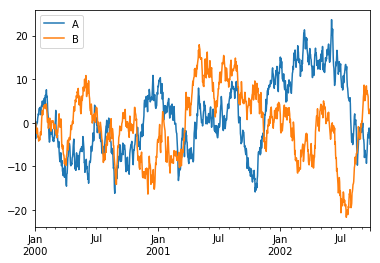

In [24]:
r[['A','B']].aggregate(np.sum).plot()

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting